# Traffic Signs Recognition

**Description:**

Self-driving cars are the future as people can entirely depend on the car for traveling.

 

In the world of AI, many researchers and big companies like Tesla, Google, Mercedes-Benz, Toyota, Ford, and Audi are working on self-driving vehicles and cars. To achieve accuracy with this technology, vehicles need to understand and follow the traffic rules accordingly.

There are many types of traffic signs, such as no parking, speed limit, no-entry, turn left or right, school ahead, no honking, and so on.

**Objective:**

To create a model that can accurately distinguish between distinct traffic signals from photos using a Convolutional Neural Network

**Dataset Details:**

The dataset contains three folders and two Excel files, which are:

Train folder: This folder has a subfolder with a class label as its name, and the sub-folder has images related to the class that can be used for training the model.

Test folder: It has 12631 images that should be used to evaluate the model.

Sample images for classes: It has one image of each class in high definition for illustration purposes.

Train_data_label Excel file: This file has the class Id of all the images in the train folder along with its path.

Test_data_label Excel file:﻿ It has the path/name of the images in the test folder along with its class label.

# 1. Import Libraries and Dataset

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
import json

In [2]:
# Import Train_data_label file
train = pd.read_csv('signs/Train_data_label.csv')
train = train[['ClassId','Path']]
test = pd.read_csv('signs/Test_data_label.csv')
test = test[['ClassId','Path']]

# 2. Exploratory Data Analysis

In [3]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  39209 non-null  int64 
 1   Path     39209 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.5 MB


This file is 3.5 MB that contains 2 columns and 39209 rows. There are no missing values.

### 2.1. Variance of datasets

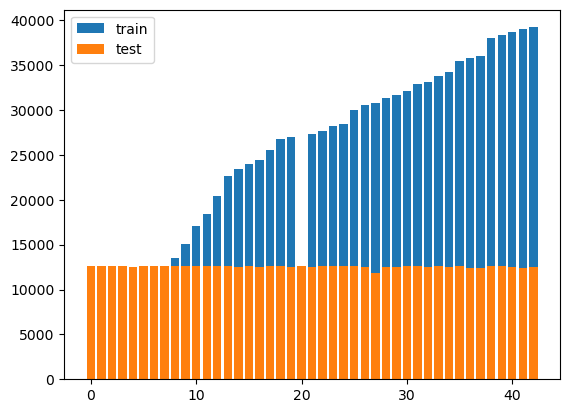

In [4]:
# Visualize skewness of datasets
x = np.arange(len(train.ClassId))
x1 = np.arange(len(test.ClassId))
fig, ax = plt.subplots()
# plot train dataset
train_b = ax.bar(train.ClassId, x, label='train')
# plot test dataset
test_b = ax.bar(test.ClassId, x1, label='test')
plt.legend()
plt.show()

The train dataset is negatively skewed (median and mode are larger than the mean) and if unaltered, the model will favor groups more on the right side of the graph. This will need to be addressed in the model or overfitting will ocurr.

### 2.2. Locating Images/Reading Variables 

In [7]:
# Setting path as a variable
folder = 'signs/Train'

# Creating size demension to 30x30
size = (30,30)

# Creating lists to specify 
resized_images = []
data = []
labels = []

# Clarifying that there are 43 classes of traffic signs 
classes = 43

# Creating a for loop to go through the main folder (train) and reading the images within the subfolders
for folder_name in os.listdir(folder):
    # Check if the item is a directory
    if os.path.isdir(os.path.join(folder, folder_name)):
        # Loop through all the images in the folder
        for filename in os.listdir(os.path.join(folder, folder_name)):
            # Check if the file is an image
            if filename.endswith(".png"):
                # Load the image using Pillow
                image = Image.open(os.path.join(folder, folder_name, filename))
                # Resize the image to target size
                resized_image = image.resize(size)
                # Create to numpy array and break into two 
                resized_image = np.array(resized_image)
                resized_images.append(resized_image)
                labels.append(folder_name)         

In [8]:
# Creating arrays
resized_images_array = np.array(resized_images)  
labels = np.array(labels)
resized_images_array.shape

(39209, 30, 30, 3)

In [9]:
# Visualize shapes to ensure correct dimensions 
print(resized_images_array.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


# 3. Feature Selection

### 3.1. Convolutional Model with Color Images

In [10]:
# Splitting of data to create variables to train and validate
X_train, X_test, y_train, y_test = train_test_split(resized_images_array, labels, test_size=0.2, random_state=0)

In [11]:
# One-Hot Encoding for the y variables
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(31367, 30, 30, 3)
(7842, 30, 30, 3)
(31367, 43)
(31367, 43)


In [14]:
# Creating CNN
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model = Sequential()
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
# Add Dropout layer to help prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting model 
color_history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test), callbacks=[early_stop])

Metal device set to: Apple M1 Pro
Epoch 1/5


2023-04-30 14:22:36.069426: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


981/981 [==============================] - 16s 16ms/step - loss: 0.1620 - accuracy: 0.6198 - val_loss: 0.0232 - val_accuracy: 0.8814
Epoch 2/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0275 - accuracy: 0.8569 - val_loss: 0.0147 - val_accuracy: 0.9345
Epoch 3/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0192 - accuracy: 0.9037 - val_loss: 0.0127 - val_accuracy: 0.9427
Epoch 4/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0164 - accuracy: 0.9219 - val_loss: 0.0110 - val_accuracy: 0.9461
Epoch 5/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0138 - accuracy: 0.9376 - val_loss: 0.0131 - val_accuracy: 0.9420


### 3.2 Convolutional Model with Grayscale Images

In [12]:
# Creating an array of the grayscale of data
grayscale_image_arr = np.dot(resized_images_array[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# Splitting of the grayscale data to create train and validate
X_train_gray, X_test_gray, y_train_gray, y_test_gray = train_test_split(grayscale_image_arr, labels, test_size=0.2, random_state=0)

# One-Hot Encoding for the y_gray variables
y_train_gray = to_categorical(y_train_gray, 43)
y_test_gray = to_categorical(y_test_gray, 43)

# Reshaping grayscale images into 4D
X_train_gray = np.reshape(X_train_gray, (*X_train_gray.shape, 1))
X_test_gray = np.reshape(X_test_gray, (*X_test_gray.shape, 1))

In [15]:
# Creating model
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model1 = Sequential()
model1.add(Conv2D(64, kernel_size=3, strides=1, activation='relu', input_shape=(30, 30, 1)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(500, activation='relu'))
# Add Dropout Layer to help prevent overfitting
model1.add(Dropout(0.5))
model1.add(Dense(43, activation='softmax'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting model 
gray_history = model1.fit(X_train_gray, y_train_gray, epochs=5, validation_data=(X_test_gray,y_test_gray), callbacks=[early_stop])

Epoch 1/5
981/981 [==============================] - 16s 16ms/step - loss: 0.2135 - accuracy: 0.5717 - val_loss: 0.0242 - val_accuracy: 0.8877
Epoch 2/5
981/981 [==============================] - 15s 16ms/step - loss: 0.0278 - accuracy: 0.8563 - val_loss: 0.0147 - val_accuracy: 0.9368
Epoch 3/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0183 - accuracy: 0.9141 - val_loss: 0.0110 - val_accuracy: 0.9612
Epoch 4/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0148 - accuracy: 0.9353 - val_loss: 0.0102 - val_accuracy: 0.9639
Epoch 5/5
981/981 [==============================] - 15s 16ms/step - loss: 0.0130 - accuracy: 0.9447 - val_loss: 0.0097 - val_accuracy: 0.9695


### 3.3. Comparing CNN Models

#### 3.3.1. Accuracy

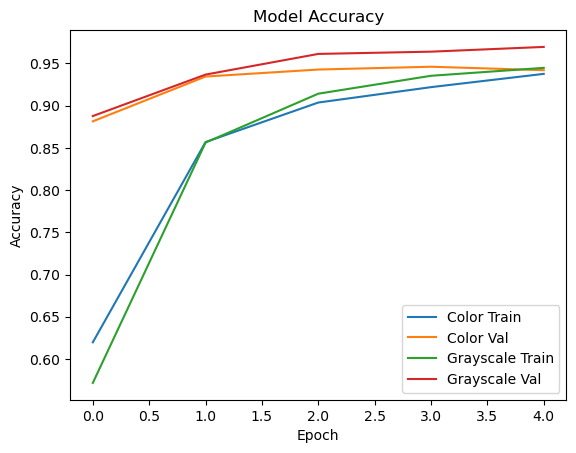

In [16]:
# Plot the training and validation accuracy for color and grayscale models
plt.plot(color_history.history['accuracy'], label='Color Train')
plt.plot(color_history.history['val_accuracy'], label='Color Val')
plt.plot(gray_history.history['accuracy'], label='Grayscale Train')
plt.plot(gray_history.history['val_accuracy'], label='Grayscale Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 3.3.2. Loss Function

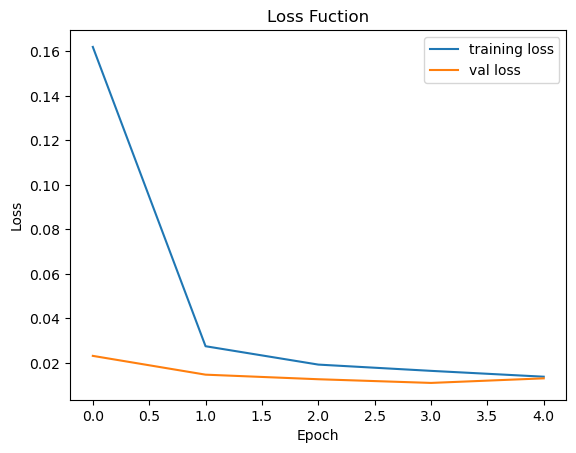

In [38]:
# plotting loss and validation losses for visual inspection
plt.plot(color_history.history['loss'], label='training loss')
plt.plot(color_history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Fuction')
plt.legend()
plt.show()

#### 3.3.3. F1 Score

In [39]:
# predict classes for color model
y_pred_color = model.predict(X_test)
y_pred_color_classes = np.argmax(y_pred_color, axis=1)
y_test_color_classes = np.argmax(y_test, axis=1)

# print classification report for color model
print("Color Model Classification Report:")
print(classification_report(y_test_color_classes, y_pred_color_classes))

# predict classes for grayscale model
y_pred_gray = model1.predict(X_test_gray)
y_pred_gray_classes = np.argmax(y_pred_gray, axis=1)
y_test_gray_classes = np.argmax(y_test_gray, axis=1)

# print classification report for grayscale model
print("Grayscale Model Classification Report:")
print(classification_report(y_test_gray_classes, y_pred_gray_classes))

246/246 [==============================] - 1s 3ms/step
Color Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        45
           1       0.98      0.87      0.92       464
           2       0.93      0.93      0.93       461
           3       0.96      0.90      0.93       279
           4       0.87      0.98      0.92       398
           5       0.88      0.93      0.90       378
           6       0.98      0.98      0.98        95
           7       0.96      0.89      0.92       290
           8       0.92      0.95      0.93       263
           9       0.97      0.96      0.96       303
          10       0.92      0.98      0.95       401
          11       0.94      0.96      0.95       248
          12       0.98      0.99      0.99       384
          13       0.98      0.99      0.99       431
          14       0.98      1.00      0.99       166
          15       0.97      0.99      0.98  

The F1 score is the combination of the recall and precisions scores to measure a models performance. Both macro and weighted F1 scores were superior in the grayscale model. The grayscale model also performed better in the accuracy and loss funcion analyses. 

## 4. Model Predictions

In [19]:
# creating dictionary of classes with their respective strings (names) 
class_names = {0: 'Speed limit (20km/h)',
               1: 'Speed limit (30km/h)',
               2: 'Speed limit (50km/h)',
               3: 'Speed limit (60km/h)',
               4: 'Speed limit (70km/h)',
               5: 'Speed limit (80km/h)',
               6: 'End of speed limit (80km/h)',
               7: 'Speed limit (100km/h)',
               8: 'Speed limit (120km/h)',
               9: 'No passing',
               10: 'No passing vehicle over 3.5 tons',
               11: 'Right-of-way at the intersection',
               12: 'Priority road',
               13: 'Yield',
               14: 'Stop',
               15: 'No vehicles',
               16: 'Vehicle > 3.5 tons prohibited',
               17: 'No entry',
               18: 'General caution',
               19: 'Dangerous curve left',
               20: 'Dangerous curve right',
               21: 'Double curve',
               22: 'Bumpy road',
               23: 'Slippery road',
               24: 'Road narrows on the right',
               25: 'Road work',
               26: 'Traffic signals',
               27: 'Pedestrians',
               28: 'Children crossing',
               29: 'Bicycles crossing',
               30: 'Beware of ice/snow',
               31: 'Wild animals crossing',
               32: 'End speed + passing limits',
               33: 'Turn right ahead',
               34: 'Turn left ahead',
               35: 'Ahead only',
               36: 'Go straight or right',
               37: 'Go straight or left',
               38: 'Keep right',
               39: 'Keep left',
               40: 'Roundabout mandatory',
               41: 'End of no passing',
               42: 'End no passing vehicle > 3.5 tons'}

In [40]:
# Create function to predict and show images
def predict_and_show_image(image_path, model1, class_names):
    # Load the image and preprocess it
    img = cv2.imread(image_path)
    img = cv2.resize(img, (30, 30))
    img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=-0)

    # Predict the class probabilities and convert to class names
    proba = model1.predict(img)[0]
    class_idx = np.argmax(proba)
    class_name = class_names[class_idx]

    # Display the image and predicted class name
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(class_name)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 10ms/step


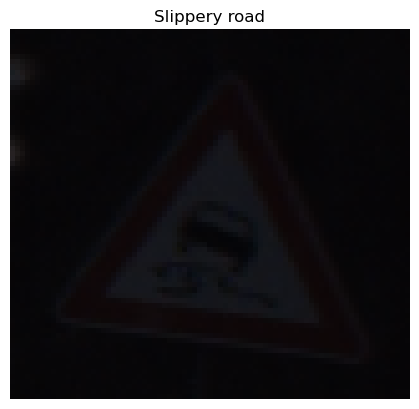

In [22]:
# Prediction 1
predict_and_show_image('signs/Test/00012.png',model1, class_names)

1/1 [==============================] - 0s 11ms/step


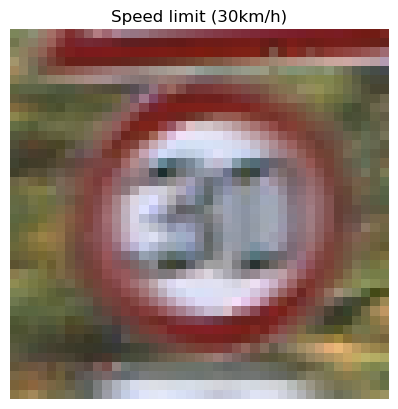

In [24]:
# Prediction 2
predict_and_show_image('signs/Test/00110.png',model1, class_names)

1/1 [==============================] - 0s 12ms/step


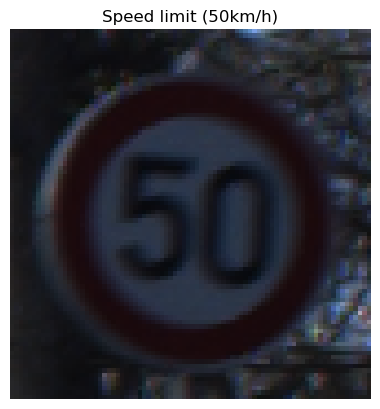

In [25]:
# Prediction 3
predict_and_show_image('signs/Test/00351.png',model1, class_names)

1/1 [==============================] - 0s 17ms/step


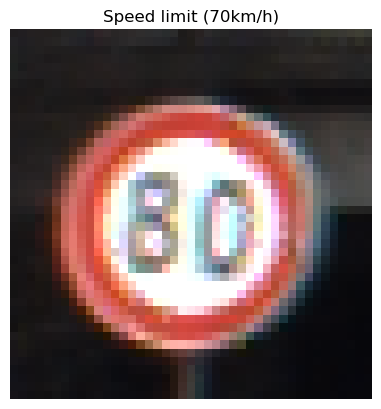

In [46]:
# Prediction 4 (misclassification)
predict_and_show_image('signs/Test/00408.png',model1, class_names)

 ## 5. Saving Model

In [48]:
# Saving grayscalel
model1.save('grayscale_model.h5')

# Savig class_names
with open('class_names.json', 'w') as f:
    json.dump(class_names, f)